# Introduction

This lab demonstrates how to use the Box-Cox and Yeo-Johnson transforms through PowerTransformer to map data from various distributions to a normal distribution.

# Import Libraries

First, we need to import the necessary libraries: numpy, matplotlib, PowerTransformer, QuantileTransformer, and train_test_split.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

# Set Constants

We will set the constants for the number of samples, font size, and bins.

In [2]:
N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30

# Create Random Distributions

We will generate six different probability distributions: Lognormal, Chi-squared, Weibull, Gaussian, Uniform, and Bimodal.

In [3]:
rng = np.random.RandomState(304)
bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")
qt = QuantileTransformer(n_quantiles=500, output_distribution="normal", random_state=rng)
size = (N_SAMPLES, 1)

# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)

# Create Plots

Now, we will create plots for each of the six distributions, showing the original distribution and the transformed distribution using Box-Cox, Yeo-Johnson, and Quantile Transformer.

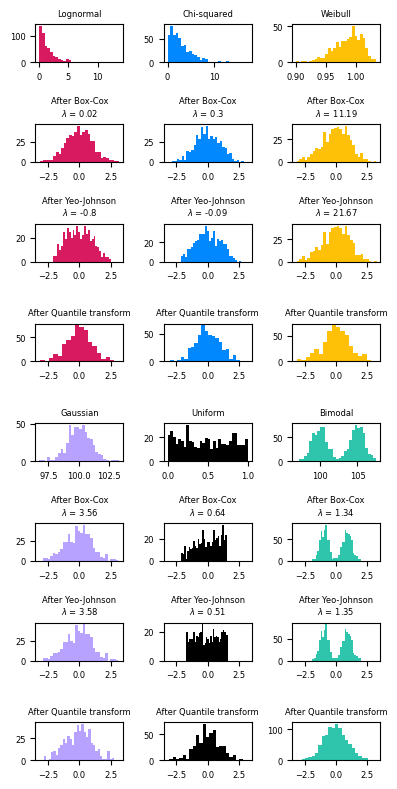

In [4]:
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]

for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])

plt.tight_layout()
plt.show()

# Summary

In this lab, we learned how to use PowerTransformer to map data from various distributions to a normal distribution using Box-Cox and Yeo-Johnson transforms. We also learned how to use QuantileTransformer to force any arbitrary distribution into a Gaussian distribution. It is important to visualize the data before and after transformation, as some transformations may be ineffective with certain datasets.